In [19]:
import pickle

# Unpickle the file
with open(r'/content/images.p', "rb") as f:
  images = pickle.load(f)

with open(r'/content/labels.p', "rb") as f:
  labels = pickle.load(f)

In [20]:
print(images.shape)
print(labels.shape)

(291, 100, 100)
(291,)


In [21]:
set(labels)

{'Aldrin', 'ritu', 'sitanshu'}

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [23]:
set(labels)

{0, 1, 2}

In [24]:
import numpy as np

In [26]:
n_persons = len(set(labels))
print("Number of persons: ", n_persons)
label_mapping = le.inverse_transform(np.arange(n_persons))
for i in range(len(label_mapping)):
  print(i, "-->", label_mapping[i])

Number of persons:  3
0 --> Aldrin
1 --> ritu
2 --> sitanshu


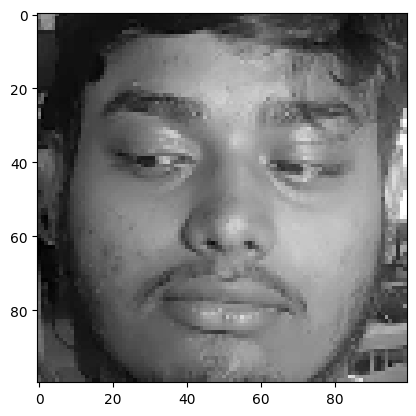

In [27]:
import matplotlib.pyplot as plt

plt.imshow(images[220], cmap=plt.get_cmap("gray"))
plt.show()

In [28]:
import cv2

In [29]:
def preprocessing(img):
  img = cv2.equalizeHist(img)
  img = img.reshape(100, 100, 1)
  img = img/255
  return img

In [30]:
images = np.array(list(map(preprocessing, images)))
print("Shape of Input: ", images.shape)

Shape of Input:  (291, 100, 100, 1)


In [31]:
from tensorflow.keras.utils import to_categorical

In [32]:
labels = to_categorical(labels)

In [33]:
categories = labels.shape[1]
print(categories)

3


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# import convolution layer
from tensorflow.keras.layers import Conv2D
# import pooling layer
from tensorflow.keras.layers import MaxPooling2D
# import faltten layer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop

In [35]:
model = Sequential()
model.add(Conv2D(32, (5,5), input_shape=(100, 100, 1), activation="relu"))
model.add(Conv2D(32, (5,5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))

model.add(Dense(categories, activation="softmax"))
model.compile(RMSprop(lr=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 96, 96, 32)        832       
                                                                 
 conv2d_5 (Conv2D)           (None, 92, 92, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 46, 46, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 42, 42, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 21, 21, 64)       0         
 2D)                                                  

In [37]:
h=model.fit(images,labels,validation_split=0.2,batch_size=50,epochs=10,verbose=1)

Epoch 1/10
5/5 [==============================] - 3s 416ms/step - loss: 1.7699 - accuracy: 0.3491 - val_loss: 3.0054 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 43ms/step - loss: 1.0754 - accuracy: 0.5474 - val_loss: 1.0910 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 0s 42ms/step - loss: 1.1544 - accuracy: 0.6379 - val_loss: 1.0906 - val_accuracy: 0.7966
Epoch 4/10
5/5 [==============================] - 0s 43ms/step - loss: 0.7620 - accuracy: 0.8147 - val_loss: 1.0971 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 0s 45ms/step - loss: 0.4266 - accuracy: 0.8405 - val_loss: 2.6210 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 0s 44ms/step - loss: 0.3839 - accuracy: 0.8405 - val_loss: 0.1911 - val_accuracy: 0.9661
Epoch 7/10
5/5 [==============================] - 0s 45ms/step - loss: 0.1960 - accuracy: 0.9052 - val_loss: 1.3020 - val_accuracy: 0.7288
Epoch 8/10

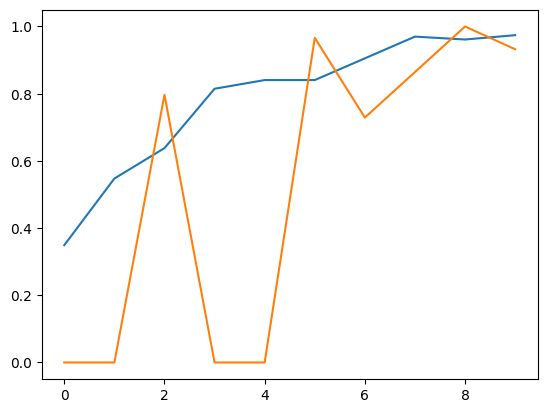

In [38]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.show()

In [39]:
from tensorflow.keras.models import Model

In [40]:
layer0 = Model(model.layers[0].input, model.layers[0].output)
features = layer0.predict(images[69].reshape(1,100,100,1))

1/1 [==============================] - 0s 92ms/step


In [41]:
features.shape

(1, 96, 96, 32)

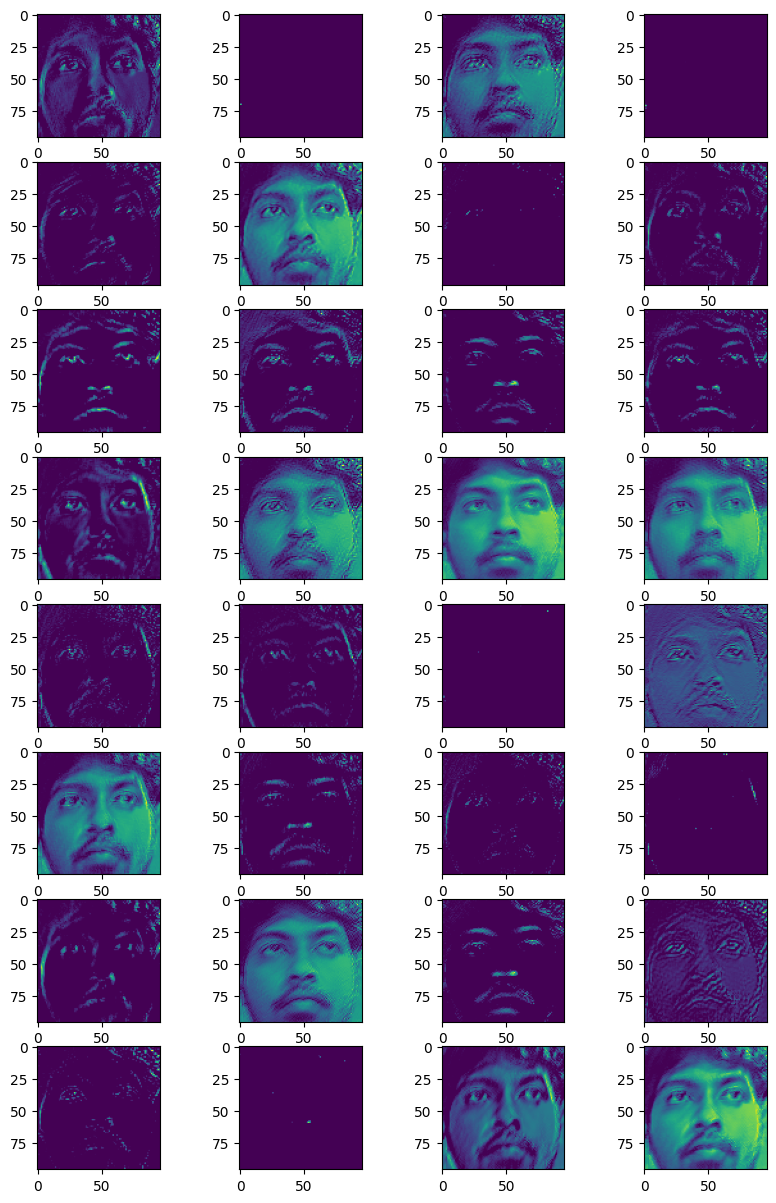

In [44]:
plt.figure(figsize=(10,15))
for i in range(32):
  axes = plt.subplot(8, 4, i+1)
  plt.imshow(features[0,:,:,i])

In [55]:
from google.colab import files
upload=files.upload()

Saving Akash_3.jpg to Akash_3.jpg


In [56]:
d=list(upload.keys())[0]

[255 216 255 ... 127 255 217]


<ipython-input-57-6cc6288e281e>:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  a=np.fromstring(upload[d],np.uint8)


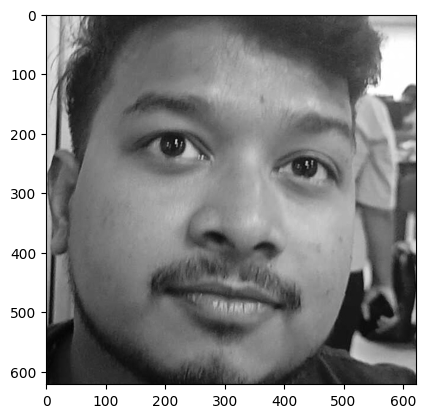

In [57]:
import cv2
a=np.fromstring(upload[d],np.uint8)
img=cv2.imdecode(a,cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(a)
plt.imshow(img,cmap=plt.get_cmap("gray"))

In [58]:
img=np.asarray(img)
img=cv2.resize(img,(100,100))
img=preprocessing(img)

img=img.reshape(1,100,100,1)
prediction= model.predict(img)

1/1 [==============================] - 0s 20ms/step


In [59]:
p=np.argmax(prediction,axis=1)
p

array([2])

In [60]:
model.save("final_model.h5")